# Building a web scrapper for News articles related to stocks

Importing required packages

In [86]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import xlrd
import re

Scanning the data from the URL

In [87]:
scanned_data = requests.get("https://www.prnewswire.com/news-releases/financial-services-latest-news/financial-services-latest-news-list/?page=1&pagesize=100").text


Parsing and Scrapping the data from the scanned HTML content

In [88]:
soup = BeautifulSoup(scanned_data, "lxml")
news_articles = soup.findAll("a", class_= "newsreleaseconsolidatelink display-outline")
articles = []
for article in range(len(news_articles)):
    specific_article = news_articles[article]
    article_title = specific_article.find("h3").text.replace("\n", "") # removing /n for the news titles and so using replace to replace it with empty string
    acticle_data = {"News_Title": article_title, "News_Description": specific_article.find("p").text.replace("\n", ""), "News_Time": specific_article.find("small").text.replace("\n", "")}
    articles.append(acticle_data)

Saving the Articles to Excel file

In [89]:
#Excel for better readibility :
df = pd.DataFrame(data=articles, columns=['News_Title', 'News_Description', 'News_Time'])
df.index = np.arange(1, len(df)+1)
df.to_excel('financial_news_top_100.xls')

C:\Users\rahul\AppData\Local\Temp/ipykernel_28232/1817405702.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('financial_news_top_100.xls')


Reading the Excel file that is saved to filter the articles

In [90]:
# We can basically use "articles" object to filter out but we are again reading the exvel just to make sure that we are getting the same data and to showcase things are working fine.

file = ("financial_news_top_100.xls")
 
wb = xlrd.open_workbook(file)
sheet = wb.sheet_by_index(0)
sheet.cell_value(1, 1)

articles_to_filter = {}
for i in range(1, sheet.nrows):
    title = sheet.cell(i,1).value
    desc = sheet.cell(i,2).value
    articles_to_filter[title] = desc


Filtering the Stock symbols form the whole data

In [91]:
filtered_articles = {k: v for k, v in articles_to_filter.items() if any(x in v.lower() for x in ['nasdaq:','nyse:','tsx:'])}
stock_symbols = []
for k,v in filtered_articles.items():
    # filtering out stock symbols from values of filtered_articles
    if "nasdaq:" in v.lower():
        stock_symbols.append(v.lower()[v.lower().find("nasdaq:")+len("nasdaq:"):].split()[0].upper().replace(')','').replace(']','').replace(';',''))
    elif "nyse:" in v.lower():
        stock_symbols.append(v.lower()[v.lower().find("nyse:")+len("nyse:"):].split()[0].upper().replace(')','').replace(']','').replace(';',''))
    elif "tsx:" in v.lower():
        stock_symbols.append(v.lower()[v.lower().find("tsx:")+len("tsx:"):].split()[0].upper().replace(')','').replace(']','').replace(';',''))
print(stock_symbols)

['...', 'HGLB', 'NXDT', 'HFRO', 'MAN,', 'PARA,', 'BMO', 'WBS,', 'STGW', 'EHTH,', 'STAG', 'TBLD', 'SWZ,', 'FAT,', 'CB', 'VEON', 'GYRO,', 'PNC', 'LVO,', 'COF']


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2021-10-04 to 2022-04-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          126 non-null    float64
 1   High          126 non-null    float64
 2   Low           126 non-null    float64
 3   Close         126 non-null    float64
 4   Volume        126 non-null    int64  
 5   Dividends     126 non-null    float64
 6   Stock Splits  126 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 7.9 KB
                 Open
Date                 
2021-10-04  50.572192
2021-10-05  52.016273
2021-10-06  52.084575
2021-10-07  53.343268
2021-10-08  53.235937
...               ...
2022-03-28  56.110001
2022-03-29  56.680000
2022-03-30  56.330002
2022-03-31  56.490002
2022-04-01  56.270000

[126 rows x 1 columns]
- ...: No data found, symbol may be delisted
- MAN,: No data found, symbol may be delisted
- PARA,: No data found, symbol may be d

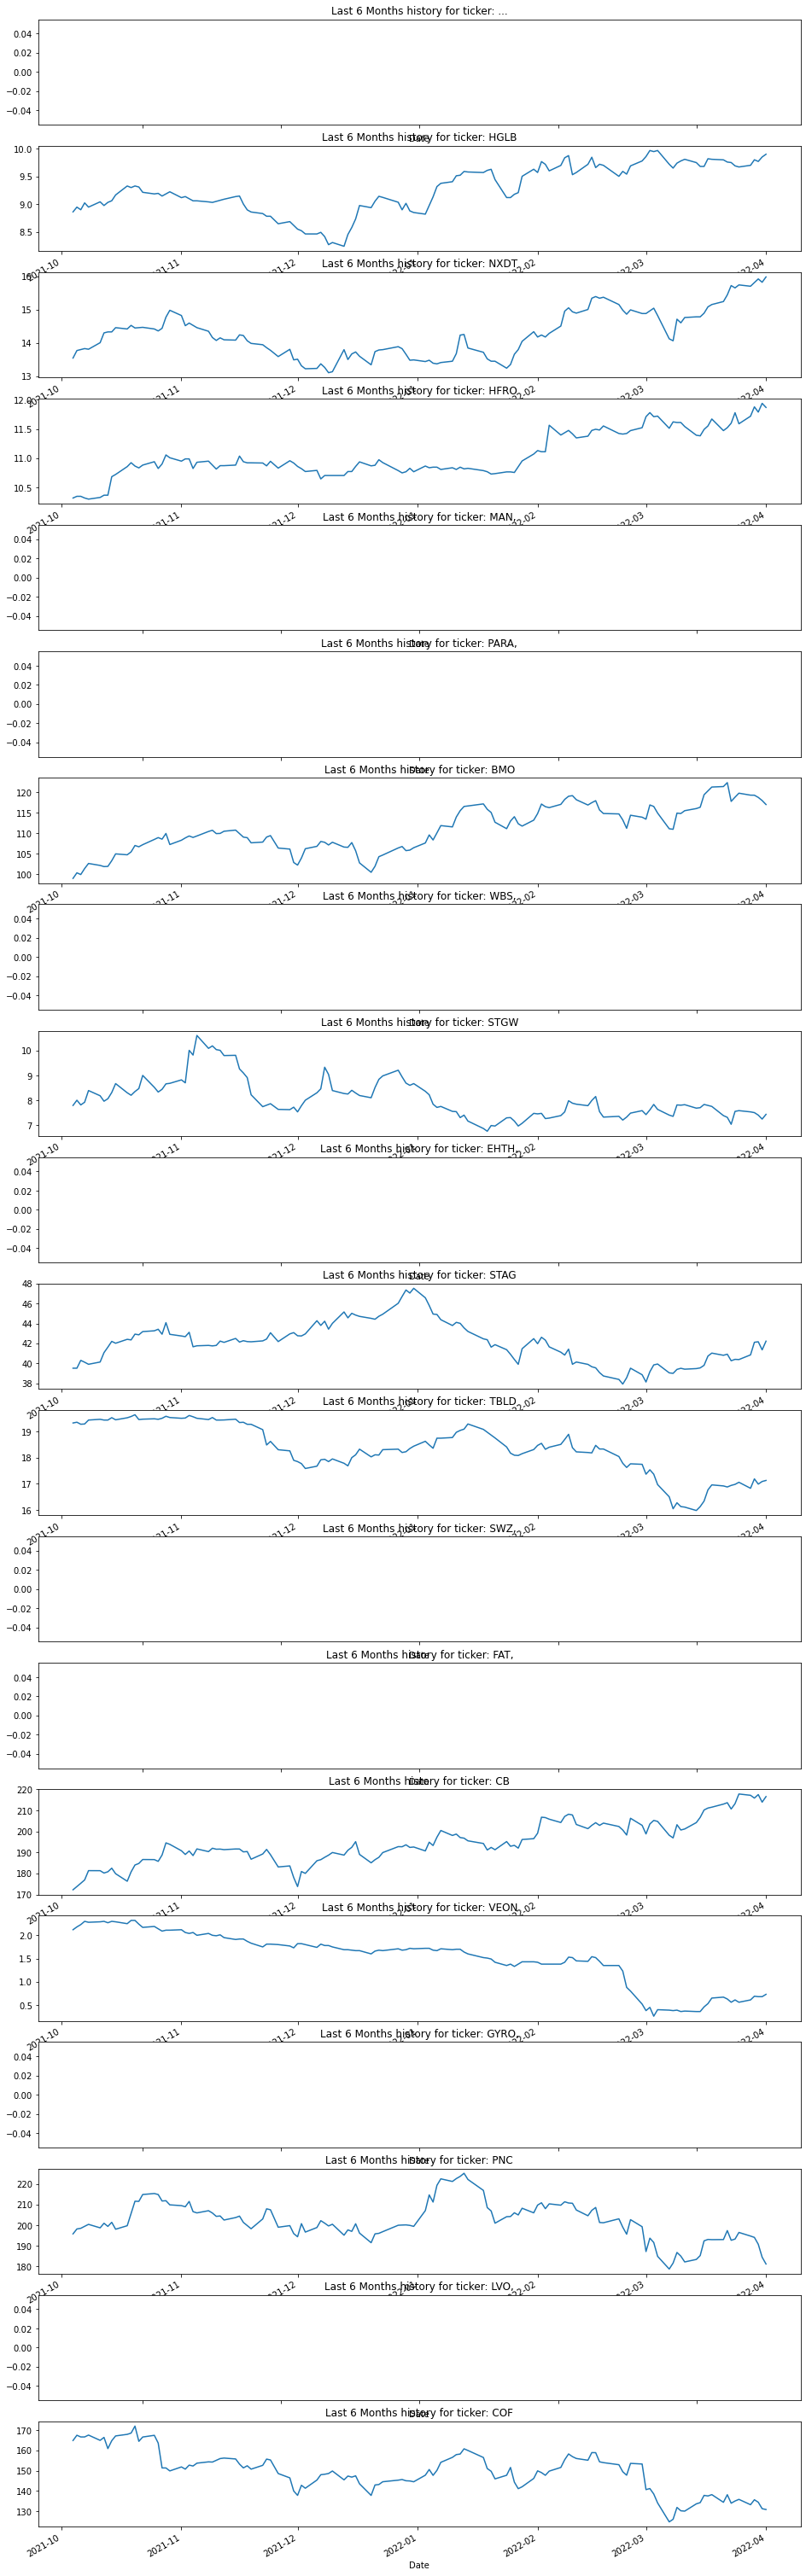

In [92]:
import yfinance as yf

pfe = yf.Ticker('SLF')
pfe.info

hist = pfe.history(period="6mo", auto_adjust=True)

hist.info()

df1 = hist[['Open']]
print(df1)

## For plotting below code is used and the upper code is just for single data thing
# tickers = ['GMBT', 'SLF', 'HLNE', 'XHR']

import matplotlib.pyplot as plt
for i,ticker in enumerate(stock_symbols):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(stock_symbols),1,i+1)
  current_ticker.history(period='6mo')['Close'].plot(figsize=(16,60), title='Last 6 Months history for ticker: '+ticker)